# Python session - 3.3

## Plotting

http://tobyhodges.github.io/python-novice-gapminder/39-plotting/

#### Questions
- How can I plot my data?

#### Objectives
- Create a time series plot showing a single data set.
- Create a scatter plot showing relationship between two data sets.

#### `matplotlib` is the most widely used scientific plotting library in Python.

- Commonly use a sub-library called `matplotlib.pyplot`.
- The Jupyter Notebook will render plots inline if we ask it to using a “magic” command.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

plt

<module 'matplotlib.pyplot' from '/home/carpentry/conda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

Text(0.5, 1.0, 'Title')

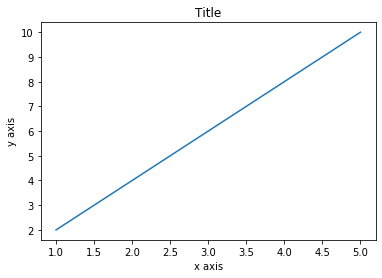

In [3]:
# Simple plots are then (fairly) simple to create.

x = [1, 2, 3, 4, 5]
y = [2, 4, 6, 8, 10]

# Plot
plt.plot(x, y)

# Label
plt.xlabel("x axis")
plt.ylabel("y axis")
# Title
plt.title("Title")

#### Plot data directly from a Pandas `DataFrame`.

- We can also plot Pandas dataframes.
- This implicitly uses `matplotlib.pyplot`.

(array([ 5000., 10000., 15000., 20000., 25000., 30000., 35000., 40000.]),
 <a list of 8 Text yticklabel objects>)

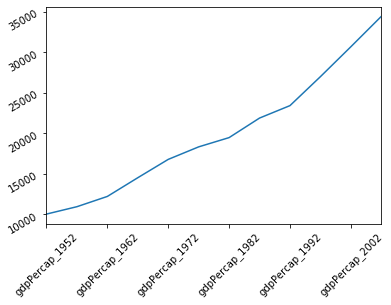

In [4]:
import pandas

# read file

df = pandas.read_csv('data/gapminder_gdp_oceania.csv', index_col='country')

# Plot for australia data
df.loc["Australia"].plot()

# Tick rotation
plt.xticks(rotation=45)
plt.yticks(rotation=30)

#### Select and transform data, then plot it.

- By default, `DataFrame.plot` plots with the rows as the X axis.
- We can transpose the data in order to plot multiple series.

(array([ 0.,  2.,  4.,  6.,  8., 10., 12.]),
 <a list of 7 Text xticklabel objects>)

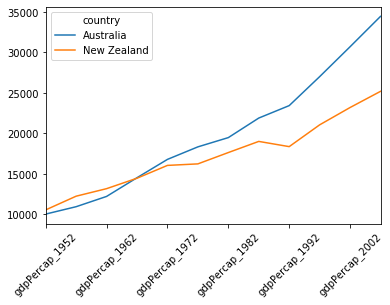

In [5]:
# Y label
df.T.plot()
plt.xticks(rotation=45)

#### Many styles of plot are available.

- For example, do a bar plot using a fancier style.

(array([1, 2]), <a list of 2 Text xticklabel objects>)

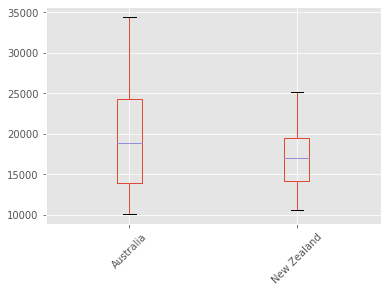

In [6]:
plt.style.use('ggplot')

#help(df.plot)

# Make a boxplot
df.T.plot(kind="box")
plt.xticks(rotation=45)
#df.T.plot(kind="scatter", x="Australia", y="New Zealand")
#plt.ylabel('GDP per capita')

- Extract years from the last four characters of the columns’ names.
- Store these in a list using the Accumulator pattern.
- Can also convert dataframe data to a list.

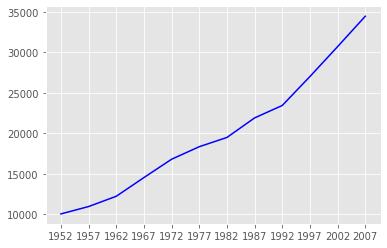

In [7]:
# Accumulator pattern to collect years (as character strings).
# Hint: year is the last 4 characters of the column name
df.columns[0][-4:]

years = []
for col in df.columns:
    years.append(col[-4:])

years

# Australia data as list.
australia = df.loc["Australia"]
australia

# Plot: 'b-' sets the line style.
plt.plot(years, australia, 'b-', label="Australia")

Text(0, 0.5, 'GDP per capita ($)')

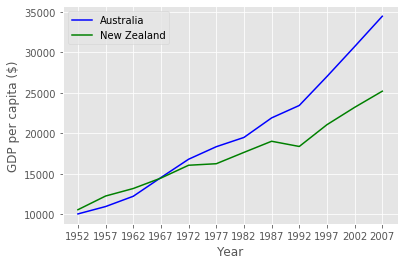

In [8]:
#### Can plot many sets of data together.

# Accumulator pattern to collect years (as character strings).
years = []
for cols in df.columns:
    years.append(cols[-4:])
    
# Select two countries' worth of data.
australia = df.loc['Australia']
nzland = df.loc['New Zealand']

# Plot with differently-colored markers.
plt.plot(years, australia, 'b-', label="Australia")
plt.plot(years, nzland, 'g-', label="New Zealand")

# Create legend

plt.legend(loc='upper left')
plt.xlabel("Year")
plt.ylabel("GDP per capita ($)")


- Plot a scatter plot correlating the GDP of Australia and New Zealand
- Use either `plt.scatter` or `DataFrame.plot.scatter`

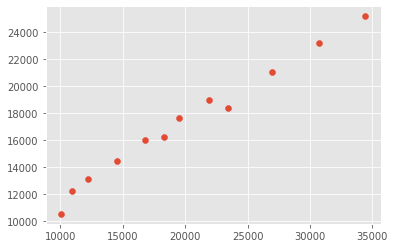

In [9]:
plt.scatter(australia, nzland)

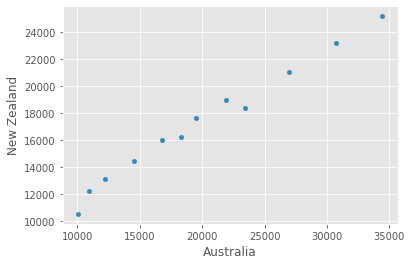

In [10]:
df.T.plot.scatter(x="Australia", y="New Zealand")

#### Exercise - Minima and Maxima

Fill in the blanks below to plot the minimum GDP per capita over time for all the countries in Europe. Modify it again to plot the maximum GDP per capita over time for Europe.

Text(0.5, 0, 'GDP Per Capita')

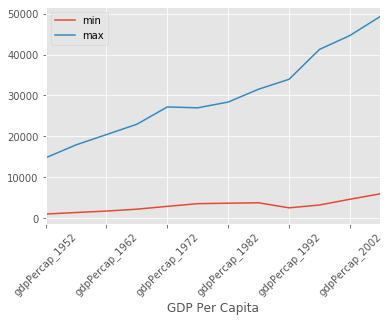

In [11]:
data_europe = pandas.read_csv('data/gapminder_gdp_europe.csv', index_col='country')
data_europe.min().plot(label='min')
data_europe.max().plot(label='max')
plt.legend(loc='best')
plt.xticks(rotation=45)
plt.xlabel("GDP Per Capita")

#### Exercise - Correlations

Modify the example in the notes to create a scatter plot showing the relationship between the minimum and maximum GDP per capita among the countries in Asia for each year in the data set. What relationship do you see (if any)?

No particular correlations can be seen between the minimum and maximum gdp values year on year. It seems the fortunes of asian countries do not rise and fall together.

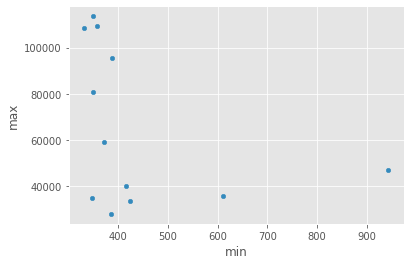

In [12]:
data_asia = pandas.read_csv('data/gapminder_gdp_asia.csv', index_col='country')
data_asia.describe().T.plot(kind='scatter', x="min", y="max")

(array([ 0.,  2.,  4.,  6.,  8., 10., 12.]),
 <a list of 7 Text xticklabel objects>)

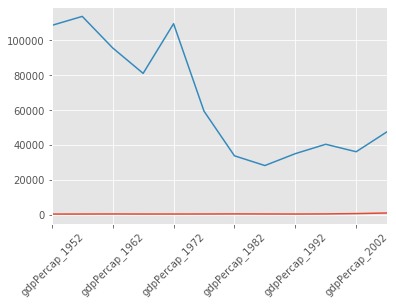

In [13]:
data_asia = pandas.read_csv('data/gapminder_gdp_asia.csv', index_col='country')
data_asia.min().plot()
data_asia.max().plot()
plt.xticks(rotation=45)

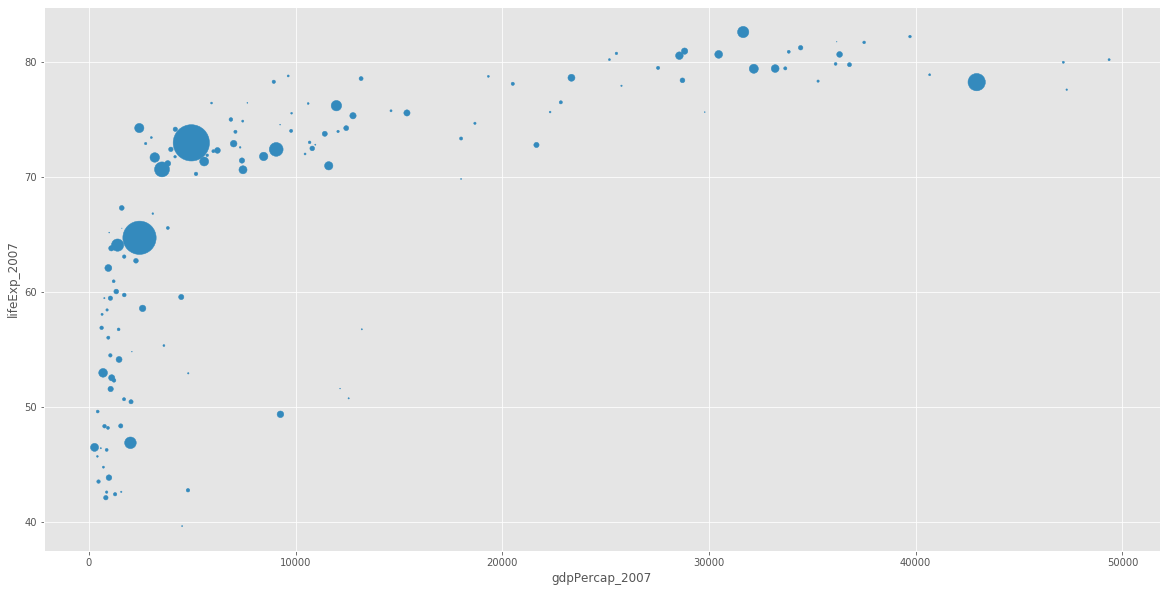

In [23]:
data_all = pandas.read_csv('data/gapminder_all.csv', index_col='country')
data_all.plot(kind='scatter', x='gdpPercap_2007', y='lifeExp_2007',
              s=data_all['pop_2007']/1e6, figsize=(20,10))

plt.savefig("test_image.png")

#### Using online help and other resources, explain what each argument to plot does.

### Keypoints

- `matplotlib` is the most widely used scientific plotting library in Python.
- Plot data directly from a Pandas `DataFrame`.
- Select and transform data, then plot it.
- Many styles of plot are available.
- Can plot many sets of data together.